# Complete Guide to Eigenvalues and Eigenvectors

## Learning Objectives
By the end of this notebook, you will understand:
1. What eigenvalues and eigenvectors are (intuitive and mathematical)
2. How to calculate them by hand and with NumPy
3. Properties and characteristics
4. Geometric interpretation
5. Applications in Machine Learning (PCA, graph analysis, stability)

---

## 1. What Are Eigenvalues and Eigenvectors?

### The Core Equation

For a square matrix $A$ and vector $\vec{v}$:

$$A\vec{v} = \lambda\vec{v}$$

Where:
- $\vec{v}$ is an **eigenvector** (special direction)
- $\lambda$ is an **eigenvalue** (scaling factor)

### Intuitive Understanding

**Most vectors change direction when multiplied by a matrix.**

**But eigenvectors are special:** They only get scaled (stretched or shrunk), not rotated!

Think of it as:
- **Eigenvector**: A direction that the transformation "loves"
- **Eigenvalue**: How much the transformation stretches/shrinks in that direction

### Real-World Analogy
Imagine a transformation that:
- Stretches things horizontally by 3×
- Stretches things vertically by 2×

The horizontal and vertical axes are eigenvectors (they don't rotate)!
- Horizontal eigenvector has eigenvalue 3
- Vertical eigenvector has eigenvalue 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Simple example matrix
A = np.array([[3, 0],
              [0, 2]])

print("Matrix A (diagonal - simple case):")
print(A)

# Test with horizontal vector
v1 = np.array([1, 0])
result1 = A @ v1

print(f"\nVector v1 = {v1}")
print(f"A @ v1 = {result1}")
print(f"Result = {result1[0]} * v1 (scaled by {result1[0]})")
print("→ v1 is an eigenvector with eigenvalue 3!")

# Test with vertical vector
v2 = np.array([0, 1])
result2 = A @ v2

print(f"\nVector v2 = {v2}")
print(f"A @ v2 = {result2}")
print(f"Result = {result2[1]} * v2 (scaled by {result2[1]})")
print("→ v2 is an eigenvector with eigenvalue 2!")

# Test with a non-eigenvector
v3 = np.array([1, 1])
result3 = A @ v3

print(f"\nVector v3 = {v3}")
print(f"A @ v3 = {result3}")
print("→ v3 is NOT an eigenvector (direction changed!)")

Matrix A (diagonal - simple case):
[[3 0]
 [0 2]]

Vector v1 = [1 0]
A @ v1 = [3 0]
Result = 3 * v1 (scaled by 3)
→ v1 is an eigenvector with eigenvalue 3!

Vector v2 = [0 1]
A @ v2 = [0 2]
Result = 2 * v2 (scaled by 2)
→ v2 is an eigenvector with eigenvalue 2!

Vector v3 = [1 1]
A @ v3 = [3 2]
→ v3 is NOT an eigenvector (direction changed!)


### Visualizing Eigenvectors

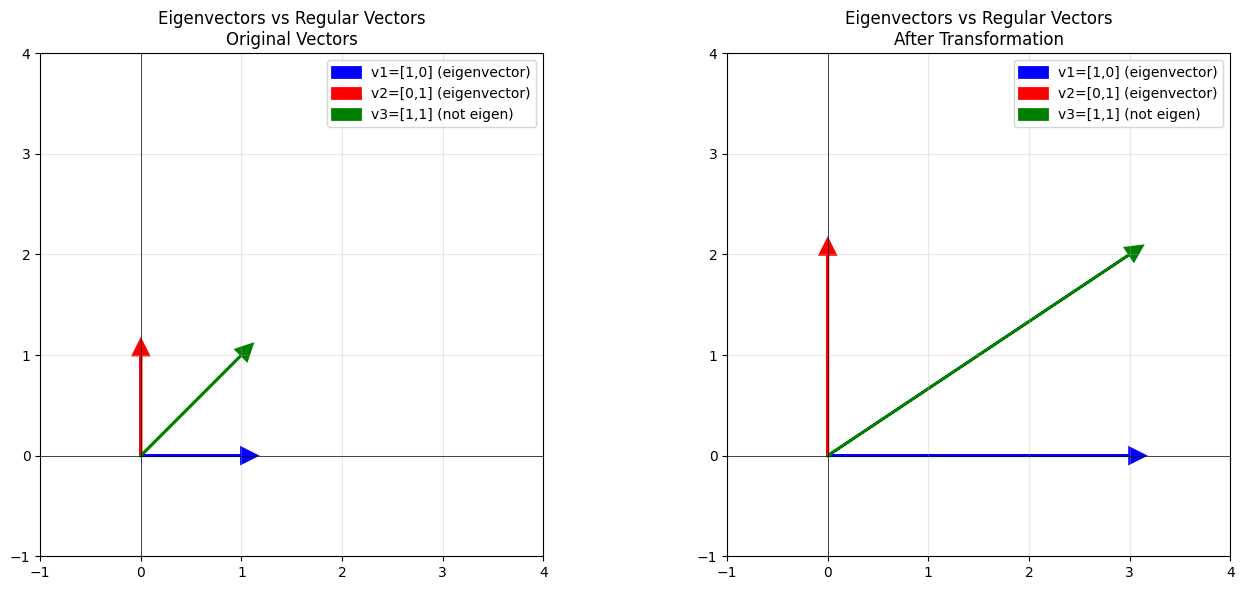

In [3]:
def plot_transformation(A, vectors, labels, title):
    """Plot vectors before and after transformation"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    colors = ['blue', 'red', 'green']
    
    for ax, t, subtitle in zip([ax1, ax2], ['Before', 'After'], 
                                ['Original Vectors', 'After Transformation']):
        ax.set_xlim(-1, 4)
        ax.set_ylim(-1, 4)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.axhline(y=0, color='k', linewidth=0.5)
        ax.axvline(x=0, color='k', linewidth=0.5)
        ax.set_title(f'{title}\n{subtitle}')
        
        for i, (v, label) in enumerate(zip(vectors, labels)):
            if t == 'Before':
                vec = v
            else:
                vec = A @ v
            
            ax.arrow(0, 0, vec[0], vec[1], head_width=0.15, head_length=0.15,
                    fc=colors[i], ec=colors[i], linewidth=2, label=label)
        
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Visualize
A = np.array([[3, 0], [0, 2]])
vectors = [np.array([1, 0]), np.array([0, 1]), np.array([1, 1])]
labels = ['v1=[1,0] (eigenvector)', 'v2=[0,1] (eigenvector)', 'v3=[1,1] (not eigen)']

plot_transformation(A, vectors, labels, 'Eigenvectors vs Regular Vectors')

---
## 2. Mathematical Definition

### Finding Eigenvalues

Starting from: $A\vec{v} = \lambda\vec{v}$

Rearrange: $A\vec{v} - \lambda\vec{v} = 0$

Factor: $(A - \lambda I)\vec{v} = 0$

For non-trivial solution: $\det(A - \lambda I) = 0$

This is the **characteristic equation**!

### Step-by-Step Process

1. **Find eigenvalues**: Solve $\det(A - \lambda I) = 0$
2. **Find eigenvectors**: For each $\lambda$, solve $(A - \lambda I)\vec{v} = 0$

### Example: 2×2 Matrix

In [4]:
# Example matrix
A = np.array([[4, 2],
              [1, 3]])

print("Matrix A:")
print(A)

# Manual calculation for 2×2 case
print("\n=== MANUAL CALCULATION ===")
print("\nFor 2×2 matrix [[a, b], [c, d]]:")
print("Characteristic equation: λ² - (a+d)λ + (ad-bc) = 0")
print(f"\nFor our matrix: λ² - {A[0,0] + A[1,1]}λ + {A[0,0]*A[1,1] - A[0,1]*A[1,0]} = 0")
print("λ² - 7λ + 10 = 0")
print("(λ - 5)(λ - 2) = 0")
print("\nEigenvalues: λ₁ = 5, λ₂ = 2")

# Using NumPy
print("\n=== NUMPY CALCULATION ===")
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenvalues:")
for i, val in enumerate(eigenvalues):
    print(f"λ{i+1} = {val:.4f}")

print("\nEigenvectors (as columns):")
print(eigenvectors)

print("\nEigenvector 1:", eigenvectors[:, 0])
print("Eigenvector 2:", eigenvectors[:, 1])

Matrix A:
[[4 2]
 [1 3]]

=== MANUAL CALCULATION ===

For 2×2 matrix [[a, b], [c, d]]:
Characteristic equation: λ² - (a+d)λ + (ad-bc) = 0

For our matrix: λ² - 7λ + 10 = 0
λ² - 7λ + 10 = 0
(λ - 5)(λ - 2) = 0

Eigenvalues: λ₁ = 5, λ₂ = 2

=== NUMPY CALCULATION ===

Eigenvalues:
λ1 = 5.0000
λ2 = 2.0000

Eigenvectors (as columns):
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

Eigenvector 1: [0.89442719 0.4472136 ]
Eigenvector 2: [-0.70710678  0.70710678]


### Verify the Eigenvalue Equation

In [5]:
# Verification: A*v should equal λ*v
print("=== VERIFICATION ===")

for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    
    Av = A @ v
    lam_v = lam * v
    
    print(f"\nEigenvalue {i+1}: λ = {lam:.4f}")
    print(f"Eigenvector: v = [{v[0]:.4f}, {v[1]:.4f}]")
    print(f"A @ v = [{Av[0]:.4f}, {Av[1]:.4f}]")
    print(f"λ * v = [{lam_v[0]:.4f}, {lam_v[1]:.4f}]")
    print(f"Equal? {np.allclose(Av, lam_v)}")

=== VERIFICATION ===

Eigenvalue 1: λ = 5.0000
Eigenvector: v = [0.8944, 0.4472]
A @ v = [4.4721, 2.2361]
λ * v = [4.4721, 2.2361]
Equal? True

Eigenvalue 2: λ = 2.0000
Eigenvector: v = [-0.7071, 0.7071]
A @ v = [-1.4142, 1.4142]
λ * v = [-1.4142, 1.4142]
Equal? True


---
## 3. Properties of Eigenvalues and Eigenvectors

### Key Properties

In [6]:
A = np.array([[4, 2],
              [1, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")

# Property 1: Sum of eigenvalues = Trace
trace = np.trace(A)
sum_eigenvalues = np.sum(eigenvalues)

print("\n=== PROPERTY 1: Sum of Eigenvalues ===")
print(f"Trace of A (sum of diagonal): {trace}")
print(f"Sum of eigenvalues: {sum_eigenvalues:.4f}")
print(f"Equal? {np.allclose(trace, sum_eigenvalues)}")

# Property 2: Product of eigenvalues = Determinant
det = np.linalg.det(A)
prod_eigenvalues = np.prod(eigenvalues)

print("\n=== PROPERTY 2: Product of Eigenvalues ===")
print(f"Determinant of A: {det:.4f}")
print(f"Product of eigenvalues: {prod_eigenvalues:.4f}")
print(f"Equal? {np.allclose(det, prod_eigenvalues)}")

# Property 3: Eigenvectors are orthogonal (for symmetric matrices)
A_sym = np.array([[2, 1],
                  [1, 2]])

eigenvalues_sym, eigenvectors_sym = np.linalg.eig(A_sym)

print("\n=== PROPERTY 3: Orthogonal Eigenvectors (Symmetric Matrix) ===")
print("Symmetric Matrix:")
print(A_sym)

v1 = eigenvectors_sym[:, 0]
v2 = eigenvectors_sym[:, 1]
dot_product = np.dot(v1, v2)

print(f"\nEigenvector 1: {v1}")
print(f"Eigenvector 2: {v2}")
print(f"Dot product: {dot_product:.10f}")
print(f"Orthogonal? {np.allclose(dot_product, 0)}")

Matrix A:
[[4 2]
 [1 3]]

Eigenvalues: [5. 2.]

=== PROPERTY 1: Sum of Eigenvalues ===
Trace of A (sum of diagonal): 7
Sum of eigenvalues: 7.0000
Equal? True

=== PROPERTY 2: Product of Eigenvalues ===
Determinant of A: 10.0000
Product of eigenvalues: 10.0000
Equal? True

=== PROPERTY 3: Orthogonal Eigenvectors (Symmetric Matrix) ===
Symmetric Matrix:
[[2 1]
 [1 2]]

Eigenvector 1: [0.70710678 0.70710678]
Eigenvector 2: [-0.70710678  0.70710678]
Dot product: 0.0000000000
Orthogonal? True


### Special Cases

In [7]:
print("=== SPECIAL CASES ===")

# Case 1: Identity matrix
I = np.eye(3)
eigenvalues_I, _ = np.linalg.eig(I)
print("\n1. Identity Matrix:")
print(I)
print(f"Eigenvalues: {eigenvalues_I}")
print("All eigenvalues are 1 (identity doesn't change anything!)")

# Case 2: Zero matrix
Z = np.zeros((3, 3))
eigenvalues_Z, _ = np.linalg.eig(Z)
print("\n2. Zero Matrix:")
print(Z)
print(f"Eigenvalues: {eigenvalues_Z}")
print("All eigenvalues are 0 (zero matrix scales everything to zero)")

# Case 3: Diagonal matrix
D = np.diag([2, 3, 5])
eigenvalues_D, _ = np.linalg.eig(D)
print("\n3. Diagonal Matrix:")
print(D)
print(f"Eigenvalues: {eigenvalues_D}")
print("Eigenvalues are the diagonal elements!")

# Case 4: Singular matrix (det = 0)
S = np.array([[1, 2],
              [2, 4]])
eigenvalues_S, _ = np.linalg.eig(S)
print("\n4. Singular Matrix:")
print(S)
print(f"Determinant: {np.linalg.det(S):.10f}")
print(f"Eigenvalues: {eigenvalues_S}")
print("At least one eigenvalue is 0 (matrix not invertible)")

=== SPECIAL CASES ===

1. Identity Matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Eigenvalues: [1. 1. 1.]
All eigenvalues are 1 (identity doesn't change anything!)

2. Zero Matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Eigenvalues: [0. 0. 0.]
All eigenvalues are 0 (zero matrix scales everything to zero)

3. Diagonal Matrix:
[[2 0 0]
 [0 3 0]
 [0 0 5]]
Eigenvalues: [2. 3. 5.]
Eigenvalues are the diagonal elements!

4. Singular Matrix:
[[1 2]
 [2 4]]
Determinant: 0.0000000000
Eigenvalues: [0. 5.]
At least one eigenvalue is 0 (matrix not invertible)


---
## 4. Geometric Interpretation

### Understanding Through Transformation

Transformation Matrix A:
[[2 1]
 [1 2]]

Eigenvalues: [3. 1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


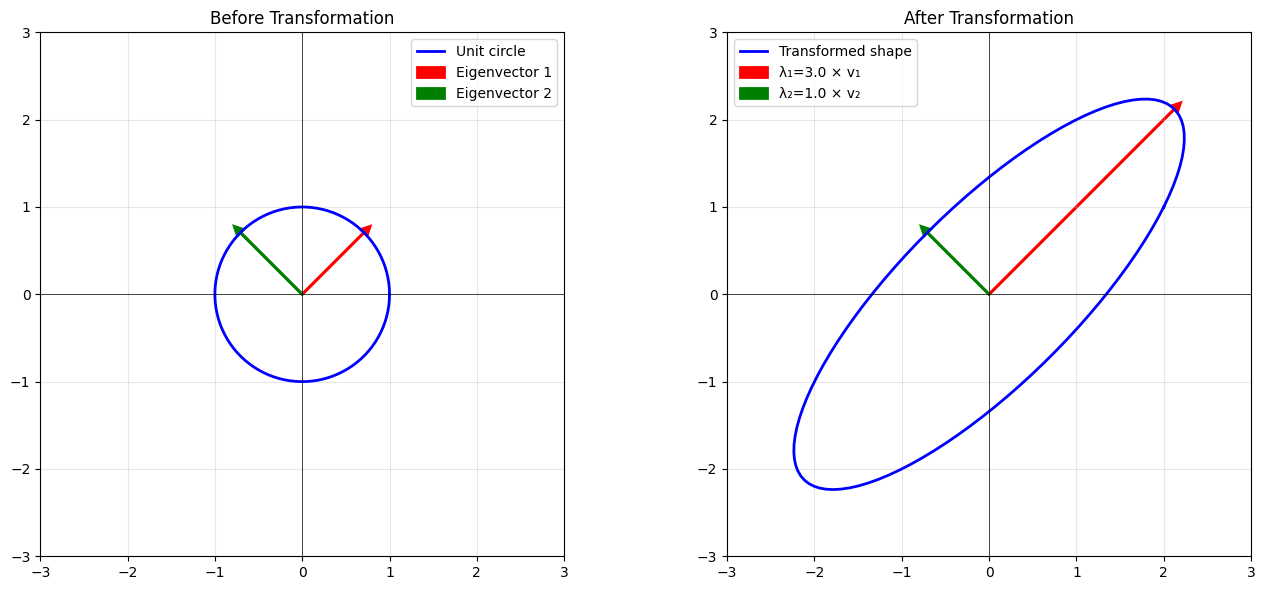


Observation:
- Circle becomes ellipse
- Eigenvector directions are preserved (axes of ellipse)
- Eigenvalues determine how much stretching occurs


In [8]:
# Create a transformation matrix
A = np.array([[2, 1],
              [1, 2]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Transformation Matrix A:")
print(A)
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")

# Create a unit circle to visualize transformation
theta = np.linspace(0, 2*np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])

# Transform the circle
ellipse = A @ circle

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Before transformation
ax1.plot(circle[0], circle[1], 'b-', linewidth=2, label='Unit circle')
ax1.arrow(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], 
         head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, label='Eigenvector 1')
ax1.arrow(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], 
         head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2, label='Eigenvector 2')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_title('Before Transformation')
ax1.legend()

# After transformation
ax2.plot(ellipse[0], ellipse[1], 'b-', linewidth=2, label='Transformed shape')
v1_transformed = eigenvalues[0] * eigenvectors[:, 0]
v2_transformed = eigenvalues[1] * eigenvectors[:, 1]
ax2.arrow(0, 0, v1_transformed[0], v1_transformed[1], 
         head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, 
         label=f'λ₁={eigenvalues[0]:.1f} × v₁')
ax2.arrow(0, 0, v2_transformed[0], v2_transformed[1], 
         head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2,
         label=f'λ₂={eigenvalues[1]:.1f} × v₂')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.set_title('After Transformation')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nObservation:")
print("- Circle becomes ellipse")
print("- Eigenvector directions are preserved (axes of ellipse)")
print("- Eigenvalues determine how much stretching occurs")

---
## 5. Applications in Machine Learning

### 5.1 Principal Component Analysis (PCA)
**The most important ML application!**

Covariance Matrix:
[[0.96863722 0.76340944]
 [0.76340944 0.68475108]]

Eigenvalues (variance explained): [1.60318742 0.05020088]

Principal Components (eigenvectors):
[[ 0.7690254  -0.63921822]
 [ 0.63921822  0.7690254 ]]

Variance explained by PC1: 96.96%
Variance explained by PC2: 3.04%


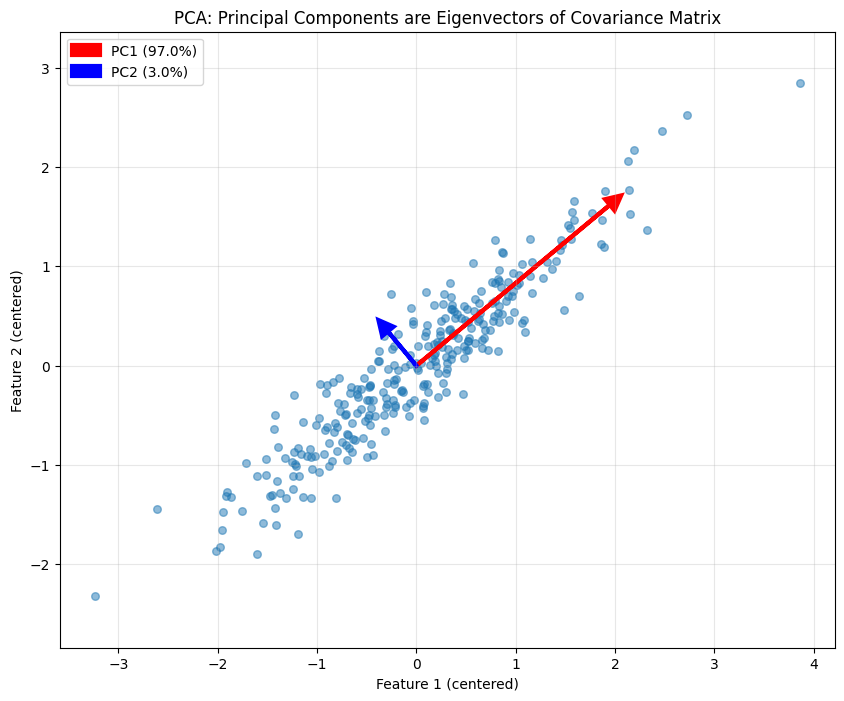


PCA Insight:
- PC1 (red) points in direction of maximum variance
- PC2 (blue) is orthogonal and captures remaining variance
- Eigenvalues tell us how important each component is


In [9]:
# Generate correlated 2D data
np.random.seed(42)
n_samples = 300

# Create data with correlation
x1 = np.random.randn(n_samples)
x2 = 0.8 * x1 + 0.3 * np.random.randn(n_samples)
X = np.column_stack([x1, x2])

# Center the data
X_centered = X - np.mean(X, axis=0)

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

print("Covariance Matrix:")
print(cov_matrix)

# Find eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalue (descending)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f"\nEigenvalues (variance explained): {eigenvalues}")
print(f"\nPrincipal Components (eigenvectors):")
print(eigenvectors)

# Variance explained
variance_explained = eigenvalues / np.sum(eigenvalues) * 100
print(f"\nVariance explained by PC1: {variance_explained[0]:.2f}%")
print(f"Variance explained by PC2: {variance_explained[1]:.2f}%")

# Visualize
plt.figure(figsize=(10, 8))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, s=30)

# Plot principal components
origin = np.mean(X, axis=0) - np.mean(X, axis=0)  # [0, 0]
scale = 2

# PC1 (explains most variance)
plt.arrow(0, 0, scale*np.sqrt(eigenvalues[0])*eigenvectors[0, 0], 
         scale*np.sqrt(eigenvalues[0])*eigenvectors[1, 0],
         head_width=0.15, head_length=0.15, fc='red', ec='red', linewidth=3,
         label=f'PC1 ({variance_explained[0]:.1f}%)')

# PC2 (explains remaining variance)
plt.arrow(0, 0, scale*np.sqrt(eigenvalues[1])*eigenvectors[0, 1], 
         scale*np.sqrt(eigenvalues[1])*eigenvectors[1, 1],
         head_width=0.15, head_length=0.15, fc='blue', ec='blue', linewidth=3,
         label=f'PC2 ({variance_explained[1]:.1f}%)')

plt.xlabel('Feature 1 (centered)')
plt.ylabel('Feature 2 (centered)')
plt.title('PCA: Principal Components are Eigenvectors of Covariance Matrix')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("\nPCA Insight:")
print("- PC1 (red) points in direction of maximum variance")
print("- PC2 (blue) is orthogonal and captures remaining variance")
print("- Eigenvalues tell us how important each component is")

### 5.2 Google PageRank Algorithm
**Uses eigenvectors to rank web pages!**

Link Matrix M (column-stochastic):
[[0.  0.5 0.5 0. ]
 [1.  0.  0.  0.5]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 0. ]]

Each column sums to 1 (probability distribution)

Eigenvalue: 1.000000+0.000000j (should be 1)

PageRank scores:
Page 0: 0.2941
Page 1: 0.3529
Page 2: 0.2353
Page 3: 0.1176


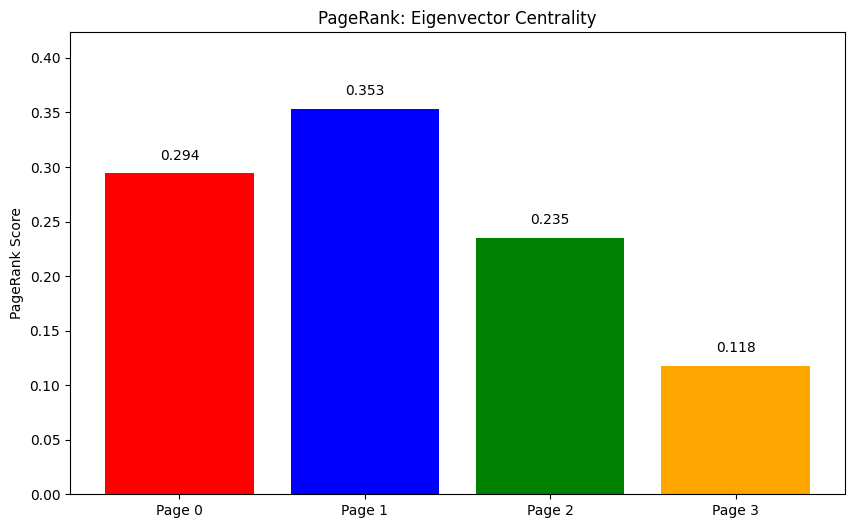


PageRank Insight:
- Most important page is the eigenvector of the link matrix
- Higher score = more 'important' based on incoming links
- This is how Google originally ranked web pages!


In [10]:
# Simplified PageRank example
# 4 web pages with links between them

# Adjacency matrix (who links to whom)
# A[i,j] = 1 if page j links to page i
A = np.array([
    [0, 1, 1, 0],  # Page 0 is linked by pages 1, 2
    [1, 0, 0, 1],  # Page 1 is linked by pages 0, 3
    [0, 1, 0, 1],  # Page 2 is linked by pages 1, 3
    [0, 0, 1, 0]   # Page 3 is linked by page 2
], dtype=float)

# Normalize columns (probability of following each link)
col_sums = A.sum(axis=0)
col_sums[col_sums == 0] = 1  # Avoid division by zero
M = A / col_sums

print("Link Matrix M (column-stochastic):")
print(M)
print("\nEach column sums to 1 (probability distribution)")

# Find eigenvector corresponding to eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(M)

# Find index of eigenvalue closest to 1
idx = np.argmin(np.abs(eigenvalues - 1))
pagerank = np.abs(eigenvectors[:, idx].real)
pagerank = pagerank / pagerank.sum()  # Normalize

print(f"\nEigenvalue: {eigenvalues[idx]:.6f} (should be 1)")
print(f"\nPageRank scores:")
for i, score in enumerate(pagerank):
    print(f"Page {i}: {score:.4f}")

# Visualize
plt.figure(figsize=(10, 6))
pages = [f'Page {i}' for i in range(4)]
plt.bar(pages, pagerank, color=['red', 'blue', 'green', 'orange'])
plt.ylabel('PageRank Score')
plt.title('PageRank: Eigenvector Centrality')
plt.ylim(0, max(pagerank) * 1.2)
for i, v in enumerate(pagerank):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

print("\nPageRank Insight:")
print("- Most important page is the eigenvector of the link matrix")
print("- Higher score = more 'important' based on incoming links")
print("- This is how Google originally ranked web pages!")

### 5.3 Stability Analysis in Dynamical Systems


Stable System:
Matrix:
[[0.8 0.1]
 [0.1 0.7]]
Eigenvalues: [0.8618034 0.6381966]
Max |eigenvalue|: 0.8618
→ STABLE: System converges to equilibrium

Unstable System:
Matrix:
[[1.2 0.1]
 [0.1 1.3]]
Eigenvalues: [1.1381966 1.3618034]
Max |eigenvalue|: 1.3618
→ UNSTABLE: System diverges


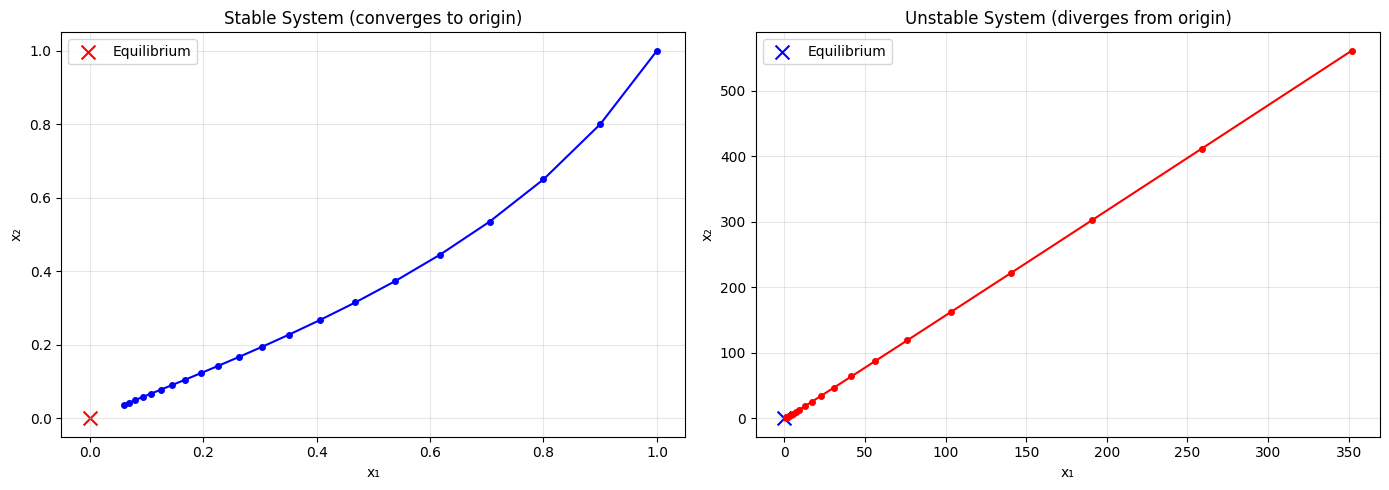


Stability Insight:
- If all |eigenvalues| < 1: system is stable (important for RNNs!)
- If any |eigenvalue| > 1: system is unstable
- This helps diagnose gradient explosion in neural networks


In [11]:
# Analyzing system stability using eigenvalues
# System: x_{t+1} = A * x_t

# Stable system (eigenvalues < 1)
A_stable = np.array([[0.8, 0.1],
                     [0.1, 0.7]])

# Unstable system (eigenvalues > 1)
A_unstable = np.array([[1.2, 0.1],
                       [0.1, 1.3]])

def analyze_stability(A, name):
    eigenvalues, _ = np.linalg.eig(A)
    max_eigenvalue = np.max(np.abs(eigenvalues))
    
    print(f"\n{name}:")
    print(f"Matrix:\n{A}")
    print(f"Eigenvalues: {eigenvalues}")
    print(f"Max |eigenvalue|: {max_eigenvalue:.4f}")
    
    if max_eigenvalue < 1:
        print("→ STABLE: System converges to equilibrium")
    elif max_eigenvalue > 1:
        print("→ UNSTABLE: System diverges")
    else:
        print("→ MARGINALLY STABLE: System oscillates")
    
    # Simulate
    x = np.array([1, 1])  # Initial state
    trajectory = [x]
    
    for _ in range(20):
        x = A @ x
        trajectory.append(x)
    
    return np.array(trajectory)

trajectory_stable = analyze_stability(A_stable, "Stable System")
trajectory_unstable = analyze_stability(A_unstable, "Unstable System")

# Plot trajectories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(trajectory_stable[:, 0], trajectory_stable[:, 1], 'bo-', markersize=4)
ax1.scatter(0, 0, color='red', s=100, marker='x', label='Equilibrium')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Stable System (converges to origin)')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(trajectory_unstable[:, 0], trajectory_unstable[:, 1], 'ro-', markersize=4)
ax2.scatter(0, 0, color='blue', s=100, marker='x', label='Equilibrium')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Unstable System (diverges from origin)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("\nStability Insight:")
print("- If all |eigenvalues| < 1: system is stable (important for RNNs!)")
print("- If any |eigenvalue| > 1: system is unstable")
print("- This helps diagnose gradient explosion in neural networks")

---
## 6. Power Iteration Method

### Finding Dominant Eigenvector

Matrix A:
[[4 1]
 [2 3]]

=== Power Iteration ===
Iteration 0: eigenvalue ≈ 3.956607
Iteration 20: eigenvalue ≈ 5.000000
Iteration 40: eigenvalue ≈ 5.000000
Iteration 60: eigenvalue ≈ 5.000000
Iteration 80: eigenvalue ≈ 5.000000

=== Comparison ===
Power iteration eigenvalue: 5.000000
NumPy eigenvalue: 5.000000

Power iteration eigenvector: [0.70710678 0.70710678]
NumPy eigenvector: [0.70710678 0.70710678]


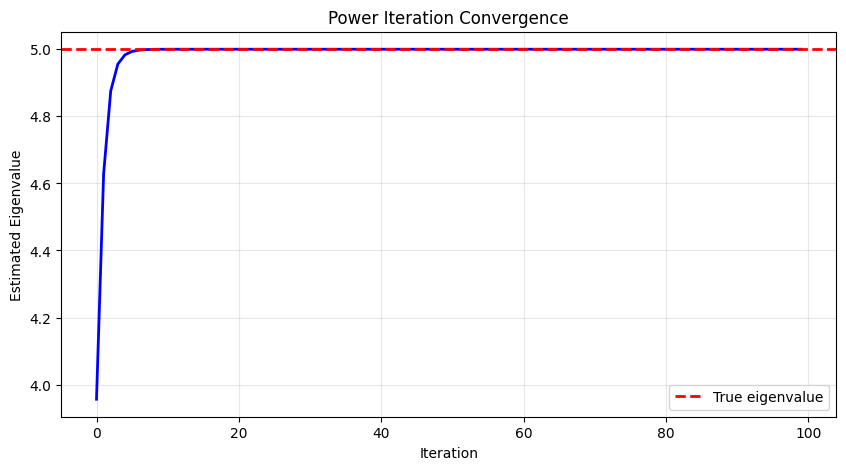


Power Iteration Insight:
- Simple iterative method to find dominant eigenvector
- Used in PageRank for large sparse matrices
- Converges if dominant eigenvalue is unique and largest


In [12]:
def power_iteration(A, num_iterations=100):
    """Find dominant eigenvector using power iteration"""
    n = A.shape[0]
    
    # Start with random vector
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    
    eigenvalues_history = []
    
    for i in range(num_iterations):
        # Multiply by A
        v_new = A @ v
        
        # Compute eigenvalue (Rayleigh quotient)
        eigenvalue = np.dot(v, A @ v) / np.dot(v, v)
        eigenvalues_history.append(eigenvalue)
        
        # Normalize
        v = v_new / np.linalg.norm(v_new)
        
        if i % 20 == 0:
            print(f"Iteration {i}: eigenvalue ≈ {eigenvalue:.6f}")
    
    return v, eigenvalue, eigenvalues_history

# Test on a matrix
A = np.array([[4, 1],
              [2, 3]])

print("Matrix A:")
print(A)
print("\n=== Power Iteration ===")

v_power, lambda_power, history = power_iteration(A, num_iterations=100)

# Compare with NumPy
eigenvalues_true, eigenvectors_true = np.linalg.eig(A)
idx = np.argmax(np.abs(eigenvalues_true))

print("\n=== Comparison ===")
print(f"Power iteration eigenvalue: {lambda_power:.6f}")
print(f"NumPy eigenvalue: {eigenvalues_true[idx]:.6f}")
print(f"\nPower iteration eigenvector: {v_power}")
print(f"NumPy eigenvector: {eigenvectors_true[:, idx]}")

# Plot convergence
plt.figure(figsize=(10, 5))
plt.plot(history, 'b-', linewidth=2)
plt.axhline(y=eigenvalues_true[idx], color='r', linestyle='--', 
           label='True eigenvalue', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Estimated Eigenvalue')
plt.title('Power Iteration Convergence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("\nPower Iteration Insight:")
print("- Simple iterative method to find dominant eigenvector")
print("- Used in PageRank for large sparse matrices")
print("- Converges if dominant eigenvalue is unique and largest")

---
## 7. Practice Exercises

### Exercise 1: Calculate Eigenvalues Manually
For the matrix A = [[3, 1], [0, 2]], find eigenvalues by hand, then verify with NumPy.

In [13]:
# Exercise 1 - Your code here
A = np.array([[3, 1],
              [0, 2]])

# Hint: For upper triangular matrix, eigenvalues are diagonal elements
# YOUR CODE


### Exercise 2: Verify Eigenvector Properties
Given matrix A, verify that A @ v = λ @ v for each eigenvalue-eigenvector pair.

In [14]:
# Exercise 2 - Your code here
A = np.array([[5, 2],
              [2, 5]])

# YOUR CODE


### Exercise 3: Mini PCA
Generate 2D data with correlation, compute covariance matrix, find principal components.

In [15]:
# Exercise 3 - Your code here
np.random.seed(123)

# Generate data
x1 = np.random.randn(200)
x2 = 0.7 * x1 + 0.5 * np.random.randn(200)
X = np.column_stack([x1, x2])

# YOUR CODE
# 1. Center the data
# 2. Compute covariance matrix
# 3. Find eigenvalues and eigenvectors
# 4. Calculate variance explained


### Exercise 4: Check Matrix Stability
Determine if the following system is stable: x_{t+1} = A x_t

In [16]:
# Exercise 4 - Your code here
A = np.array([[0.9, 0.2],
              [0.1, 0.8]])

# YOUR CODE
# 1. Find eigenvalues
# 2. Check if all |eigenvalues| < 1
# 3. Simulate 50 time steps starting from [1, 1]


---
## 8. Solutions

In [17]:
print("=== SOLUTIONS ===")

# Exercise 1
print("\nExercise 1:")
A = np.array([[3, 1], [0, 2]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print("For upper triangular matrix, eigenvalues = diagonal elements")
print(f"Eigenvalues: {eigenvalues}")
print("Manual: λ₁=3, λ₂=2")

# Exercise 2
print("\nExercise 2:")
A = np.array([[5, 2], [2, 5]])
eigenvalues, eigenvectors = np.linalg.eig(A)
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    print(f"\nλ{i+1} = {lam:.4f}, v{i+1} = {v}")
    print(f"A@v = {A@v}")
    print(f"λ*v = {lam*v}")
    print(f"Equal? {np.allclose(A@v, lam*v)}")

# Exercise 3
print("\nExercise 3:")
X_centered = X - np.mean(X, axis=0)
cov = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
variance_explained = eigenvalues / eigenvalues.sum() * 100
print(f"Variance explained: {variance_explained}%")

# Exercise 4
print("\nExercise 4:")
A = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues = np.linalg.eig(A)[0]
max_eig = np.max(np.abs(eigenvalues))
print(f"Max |eigenvalue|: {max_eig:.4f}")
print(f"Stable? {max_eig < 1}")

=== SOLUTIONS ===

Exercise 1:
For upper triangular matrix, eigenvalues = diagonal elements
Eigenvalues: [3. 2.]
Manual: λ₁=3, λ₂=2

Exercise 2:

λ1 = 7.0000, v1 = [0.70710678 0.70710678]
A@v = [4.94974747 4.94974747]
λ*v = [4.94974747 4.94974747]
Equal? True

λ2 = 3.0000, v2 = [-0.70710678  0.70710678]
A@v = [-2.12132034  2.12132034]
λ*v = [-2.12132034  2.12132034]
Equal? True

Exercise 3:
Variance explained: [92.66753399  7.33246601]%

Exercise 4:
Max |eigenvalue|: 1.0000
Stable? False


---
## 9. Key Takeaways

### Core Concepts:
1. ✅ **Eigenvectors**: Special directions that don't rotate under transformation
2. ✅ **Eigenvalues**: Scaling factors for eigenvectors
3. ✅ **Equation**: $A\vec{v} = \lambda\vec{v}$
4. ✅ **Finding them**: Solve $\det(A - \lambda I) = 0$

### Key Properties:
- Sum of eigenvalues = Trace of matrix
- Product of eigenvalues = Determinant
- Symmetric matrices have orthogonal eigenvectors
- Diagonal matrices have eigenvalues on diagonal

### ML Applications:
1. **PCA**: Principal components are eigenvectors of covariance matrix
2. **PageRank**: Importance = eigenvector of link matrix
3. **Stability Analysis**: |eigenvalue| < 1 → stable system
4. **Spectral Clustering**: Uses eigenvectors of similarity matrix
5. **Neural Networks**: Eigenvalues help diagnose gradient problems

### Computational Notes:
- Power iteration for large sparse matrices
- Only square matrices have eigenvalues
- Not all matrices are diagonalizable
- Complex eigenvalues indicate rotation

---

**Congratulations! You now understand eigenvalues and eigenvectors! 🎉**

**Next up: Matrix Decomposition (SVD, PCA) builds directly on this!**